In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [73]:
import numpy as np 
import pandas as pd 
import sys
import os
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [64]:
ARTICLES=pd.read_csv('/home/varun/metadata.csv', low_memory=False) 
ARTICLES.shape

(210537, 19)

In [66]:
Articles1= ARTICLES[['title','publish_time','journal','url','abstract','doi','cord_uid']]
Articles1.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m


In [67]:
##Evaluation of dataframe
##Looking for NaNs
NaNs=Articles1.isnull().sum()
NaNs

title              56
publish_time       18
journal         12084
url             47396
abstract        61010
doi             61733
cord_uid            0
dtype: int64

In [68]:
#I limit to those entries with ABSTRACTS
Abstracts=Articles1.copy()
Abstracts.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m


In [69]:
#separate each word in the ABSTRACT column
Abstracts['words'] = Abstracts.abstract.str.strip().str.split('[\W_]+')
Abstracts['words']

0         [OBJECTIVE, This, retrospective, chart, review...
1         [Inflammatory, diseases, of, the, respiratory,...
2         [Surfactant, protein, D, SP, D, participates, ...
3         [Endothelin, 1, ET, 1, is, a, 21, amino, acid,...
4         [Respiratory, syncytial, virus, RSV, and, pneu...
                                ...                        
210532    [Background, Thrombocytopenia, has, been, impl...
210533                                                  NaN
210534    [Picornaviruses, induce, dramatic, rearrangeme...
210535    [This, study, aims, to, assess, the, incidence...
210536    [To, determine, the, effect, renin, angiotensi...
Name: words, Length: 210537, dtype: object

In [70]:
#separate words in the abstract column and create a new column
Abs1 = Abstracts[Abstracts.words.str.len() > 0]
Abs1.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j,"[OBJECTIVE, This, retrospective, chart, review..."
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m,"[Inflammatory, diseases, of, the, respiratory,..."


In [71]:
Abs2=Abs1.isnull().sum()
Abs2

title               6
publish_time       13
journal         10310
url             23872
abstract            0
doi             35925
cord_uid            0
words               0
dtype: int64

In [72]:
# saving the dataframe 
Abs1.to_csv('Journal_Abstracts.csv') 

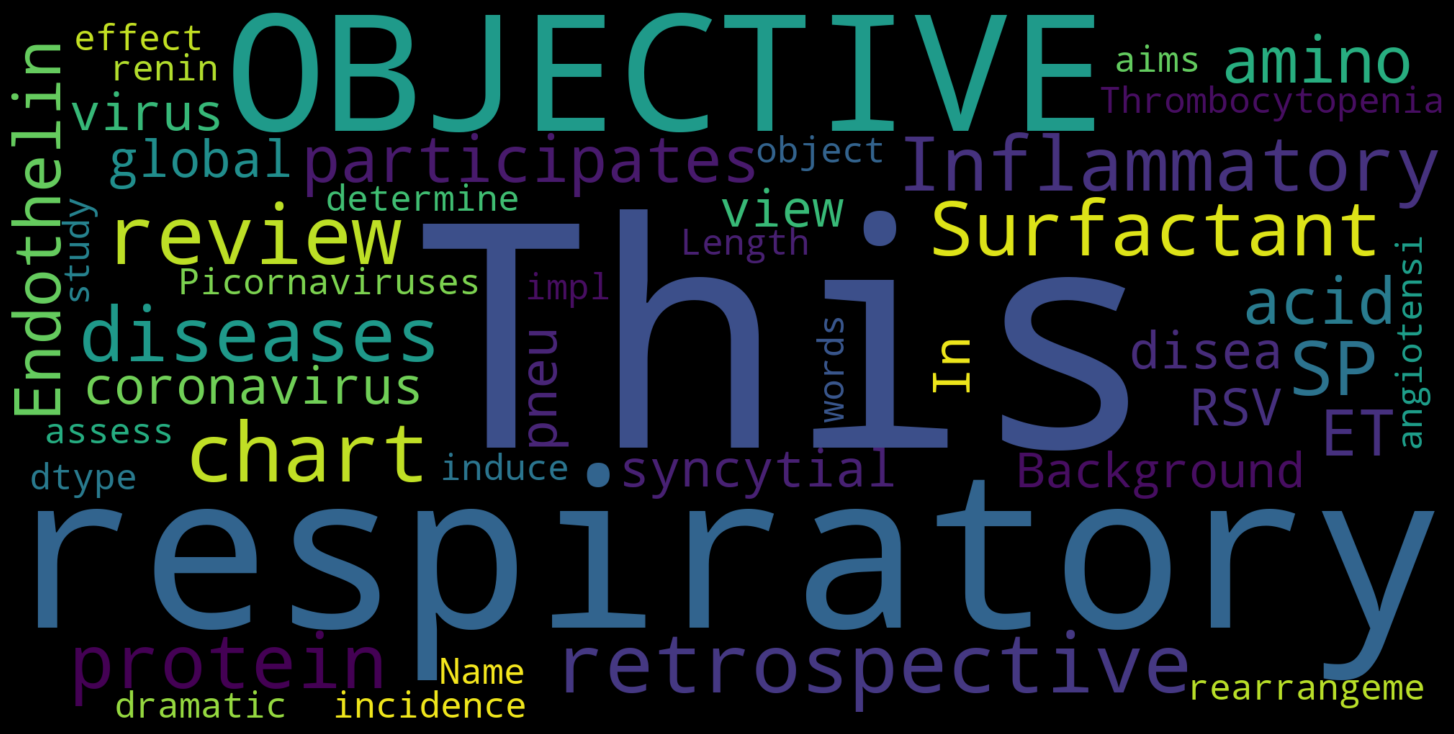

In [74]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Abs1['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [76]:
#looking through the abstracts with specific terms 
## 
##TABLE OF ABSTRACTS WITH 'sample size' 
Sample_size=Abs1[Abs1['abstract'].str.contains('sample size')]
Sample_size.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
51,Markers of exacerbation severity in chronic ob...,2006-05-10,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,BACKGROUND: Patients with chronic obstructive ...,10.1186/1465-9921-7-74,utglk4af,"[BACKGROUND, Patients, with, chronic, obstruct..."
725,True versus False Parasite Interactions: A Rob...,2012-01-03,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,BACKGROUND: Multiple infections are common in ...,10.1371/journal.pone.0029618,bbjmcdo5,"[BACKGROUND, Multiple, infections, are, common..."


In [77]:
# saving the dataframe 
Sample_size.to_csv('Sample_Size.csv') 

In [78]:
##Viral Shedding Table
Viral_shed=Abs1[Abs1['abstract'].str.contains('viral shedding')]
Viral_shed.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
317,Exposure of cats to low doses of FeLV: serocon...,2009-10-28,Vet Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,"In felids, feline leukemia virus (FeLV) infect...",10.1051/vetres/2009065,a3tammig,"[In, felids, feline, leukemia, virus, FeLV, in..."
748,Validation of Self-swab for Virologic Confirma...,2011-12-23,The Journal of Infectious Diseases,https://academic.oup.com/jid/article-pdf/205/4...,Few studies have investigated the validity of ...,10.1093/infdis/jir803,ruba65p5,"[Few, studies, have, investigated, the, validi..."


In [79]:
# saving the dataframe 
Viral_shed.to_csv('Viral_Shed.csv') 

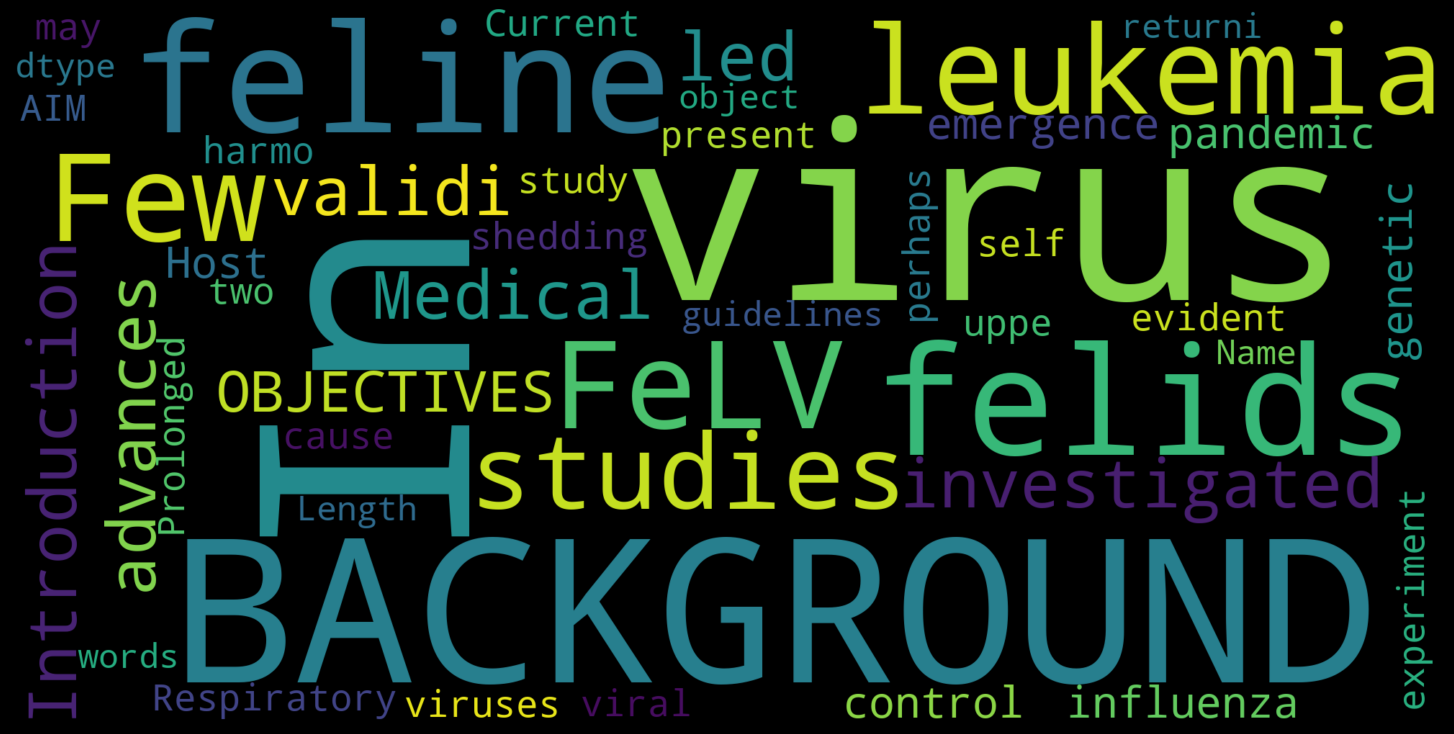

In [80]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Viral_shed['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [81]:
##1. Length of viral shedding after illness onset
Q1a=Viral_shed[Viral_shed['abstract'].str.contains('viral shedding after')]
Q1a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
76205,The Outcome Impact of Early vs Late HFNC Oxyge...,2020-05-26,NaN,http://medrxiv.org/cgi/content/short/2020.05.2...,Coronavirus disease-2019 (COVID-19) has rapidl...,10.1101/2020.05.23.20111450,215ec3ff,"[Coronavirus, disease, 2019, COVID, 19, has, r..."
103345,Case Report: Viral Shedding for 60 Days in a W...,2020,Am J Trop Med Hyg,NaN,Novel coronavirus disease (COVID-19) caused by...,NaN,1vba9l42,"[Novel, coronavirus, disease, COVID, 19, cause..."


In [83]:
Q1b=Viral_shed[Viral_shed['abstract'].str.contains('viral shedding lasts')]
Q1b

,title,publish_time,journal,url,abstract,doi,cord_uid,words
69142,Human rhinovirus and coronavirus detection amo...,2010,Blood,https://doi.org/10.1182/blood-2009-09-244152; ...,Little is known about clinical and virologic m...,10.1182/blood-2009-09-244152,9xrnvq15,"[Little, is, known, about, clinical, and, viro..."


In [84]:
Length_viral_shedding_after_onset=pd.concat([Q1a, Q1b])
##Table with articles relevant to QUESTION 1
Length_viral_shedding_after_onset.to_csv('Length_Of_Viral_Shedding_After_Onset.csv')

In [85]:
#8. What is the median viral shedding duration?
Q8=Viral_shed[Viral_shed['abstract'].str.contains('viral shedding duration')]
Q8.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
6800,Characterization of viral genomic mutations in...,2019-07-13,Virus Genes,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Since February 2013, human infections with the...",10.1007/s11262-019-01678-8,9gjlfk2w,"[Since, February, 2013, human, infections, wit..."
52384,Critically Ill Patients With the Middle East R...,2017,Critical care medicine,https://doi.org/10.1097/ccm.0000000000002621; ...,OBJECTIVES To describe patient characteristics...,10.1097/ccm.0000000000002621,xt2jgb8y,"[OBJECTIVES, To, describe, patient, characteri..."


In [86]:
Q8.to_csv('Viral_Shedding_Duration.csv')

In [87]:
#9. What is the longest duration of viral shedding?
Q9=Viral_shed[Viral_shed['abstract'].str.contains('longest')]
Q9.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
29000,Repeated COVID-19 relapse during post-discharg...,2020-08-06,J Microbiol Immunol Infect,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,A case who revealed the longest duration of vi...,10.1016/j.jmii.2020.07.017,6hg2ez30,"[A, case, who, revealed, the, longest, duratio..."
74654,Virologic and clinical characteristics for pro...,2020-04-06,NaN,https://doi.org/10.1101/2020.04.03.20051763,Background: The severe acute respiratory syndr...,10.1101/2020.04.03.20051763,4989atst,"[Background, The, severe, acute, respiratory, ..."


In [88]:
Q9.to_csv('Longest_Duration_Viral_Shedding.csv')

In [89]:
##Incubation Table
Incubation=Abs1[Abs1['abstract'].str.contains('incubation')]
Incubation.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
69,An object simulation model for modeling hypoth...,2006-08-23,Theor Biol Med Model,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"BACKGROUND: EpiFlex is a flexible, easy to use...",10.1186/1742-4682-3-32,pk7pnmlo,"[BACKGROUND, EpiFlex, is, a, flexible, easy, t..."
333,Localization of Low-Density Detergent-Resistan...,2009-05-01,Biology of Reproduction,https://academic.oup.com/biolreprod/article-pd...,Mammalian sperm become fertile after completin...,10.1095/biolreprod.108.075242,piusm60c,"[Mammalian, sperm, become, fertile, after, com..."


In [90]:
# saving the dataframe 
Incubation.to_csv('Incubation.csv') 

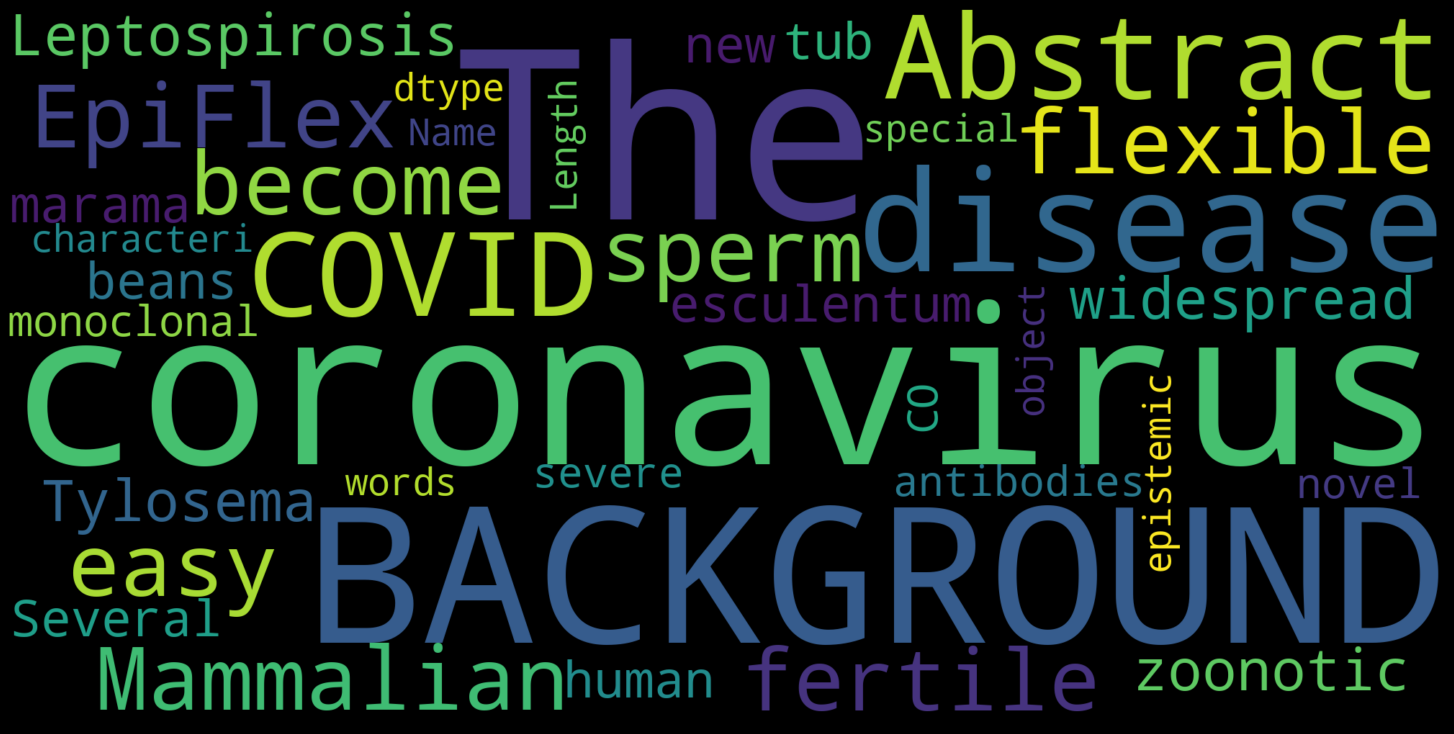

In [91]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Incubation['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [92]:
# Q2 Incubation period across different age groups
Q2a=Incubation[Incubation['abstract'].str.contains('different age')]
Q2a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
78682,Estimate the incubation period of coronavirus ...,2020-02-29,NaN,https://doi.org/10.1101/2020.02.24.20027474,Motivation: Wuhan pneumonia is an acute infect...,10.1101/2020.02.24.20027474,vkgnwxzc,"[Motivation, Wuhan, pneumonia, is, an, acute, ..."
78900,Effects of latency and age structure on the dy...,2020-04-29,NaN,http://medrxiv.org/cgi/content/short/2020.04.2...,In this paper we develop an SEIR-type model of...,10.1101/2020.04.25.20079848,rv06wb3x,"[In, this, paper, we, develop, an, SEIR, type,..."


In [93]:
Q2b=Incubation[Incubation['abstract'].str.contains('age group')]
Q2b.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
7311,The Influence of Age on Steroidogenic Enzyme A...,1987-06-01,Endocrinology,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,The ability of isolated adrenocortical cells t...,10.1210/endo-120-6-2521,4niom5mw,"[The, ability, of, isolated, adrenocortical, c..."
22220,Clinical Characteristics and Differential Clin...,2020-04-30,Coronavirus Disease 2019 (COVID-19),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Novel Coronavirus Disease (COVID-19) has becom...,10.1007/978-981-15-4814-7_6,nzjz0q8b,"[Novel, Coronavirus, Disease, COVID, 19, has, ..."


In [94]:
Q2= pd.concat([Q2a,Q2b])
Q2.to_csv('Incubation_Period_Across_Age_Groups.csv')

In [95]:
# Q3 What is the Incubation Period of the Virus?
Q3=Incubation[Incubation['abstract'].str.contains('COVID')]
Q3.head(2) 

,title,publish_time,journal,url,abstract,doi,cord_uid,words
22220,Clinical Characteristics and Differential Clin...,2020-04-30,Coronavirus Disease 2019 (COVID-19),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Novel Coronavirus Disease (COVID-19) has becom...,10.1007/978-981-15-4814-7_6,nzjz0q8b,"[Novel, Coronavirus, Disease, COVID, 19, has, ..."
22778,Role of Nasopharyngeal lactate dehydrogenase a...,2020-04-30,Indian J Med Sci,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,COVID-19 pandemic is affecting almost every co...,10.25259/ijms_25_2020,xc6sz085,"[COVID, 19, pandemic, is, affecting, almost, e..."


In [96]:
Q3.to_csv('Incubation_Period_COVID.csv')

In [98]:
#Q6 Asymptomatic transmission during incubation
Q6a=Incubation[Incubation['abstract'].str.contains('transmission during')]
Q6a.head(2)    

,title,publish_time,journal,url,abstract,doi,cord_uid,words
31081,Household secondary attack rate of COVID-19 an...,2020-06-17,The Lancet. Infectious diseases,https://doi.org/10.1016/s1473-3099(20)30471-0;...,"BACKGROUND As of June 8, 2020, the global repo...",10.1016/s1473-3099(20)30471-0,gt5pq29h,"[BACKGROUND, As, of, June, 8, 2020, the, globa..."
43064,Emergency management for preventing and contro...,2020-03-05,The British journal of dermatology,https://doi.org/10.1111/bjd.19011; https://www...,"As of Feb 15, 2019, the novel coronavirus (201...",10.1111/bjd.19011,z74suepj,"[As, of, Feb, 15, 2019, the, novel, coronaviru..."


In [99]:
Q6b=Incubation[Incubation['abstract'].str.contains('asymptomatic transmission')]
Q6b.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
1120,The Impact of Model Building on the Transmissi...,2013-04-12,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,BACKGROUND: The way we formulate a mathematica...,10.1371/journal.pone.0062062,xjfdin77,"[BACKGROUND, The, way, we, formulate, a, mathe..."
39696,What We Learned about COVID-19 So Far? Notes f...,2020-05-01,Turkish thoracic journal,https://doi.org/10.5152/turkthoracj.2020.20052...,The novel coronavirus pandemic poses a major g...,10.5152/turkthoracj.2020.20052,p0fwmnn3,"[The, novel, coronavirus, pandemic, poses, a, ..."


In [100]:
Q6= pd.concat([Q6a,Q6b])
Q6.to_csv('Asymptomatic_Transmission_During_Incubation.csv')

In [102]:
##Asymptomatic Table
Asymptomatic=Abs1[Abs1['abstract'].str.contains('asymptomatic')]
Asymptomatic.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
17,Logistics of community smallpox control throug...,2004-08-06,BMC Public Health,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,BACKGROUND: Previous smallpox ring vaccination...,10.1186/1471-2458-4-34,sgmk96vr,"[BACKGROUND, Previous, smallpox, ring, vaccina..."
42,Relevance of human metapneumovirus in exacerba...,2005-12-21,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,BACKGROUND AND METHODS: Human metapneumovirus ...,10.1186/1465-9921-6-150,qva0jt86,"[BACKGROUND, AND, METHODS, Human, metapneumovi..."


In [103]:
# saving the dataframe 
Asymptomatic.to_csv('Asymptomatic.csv') 

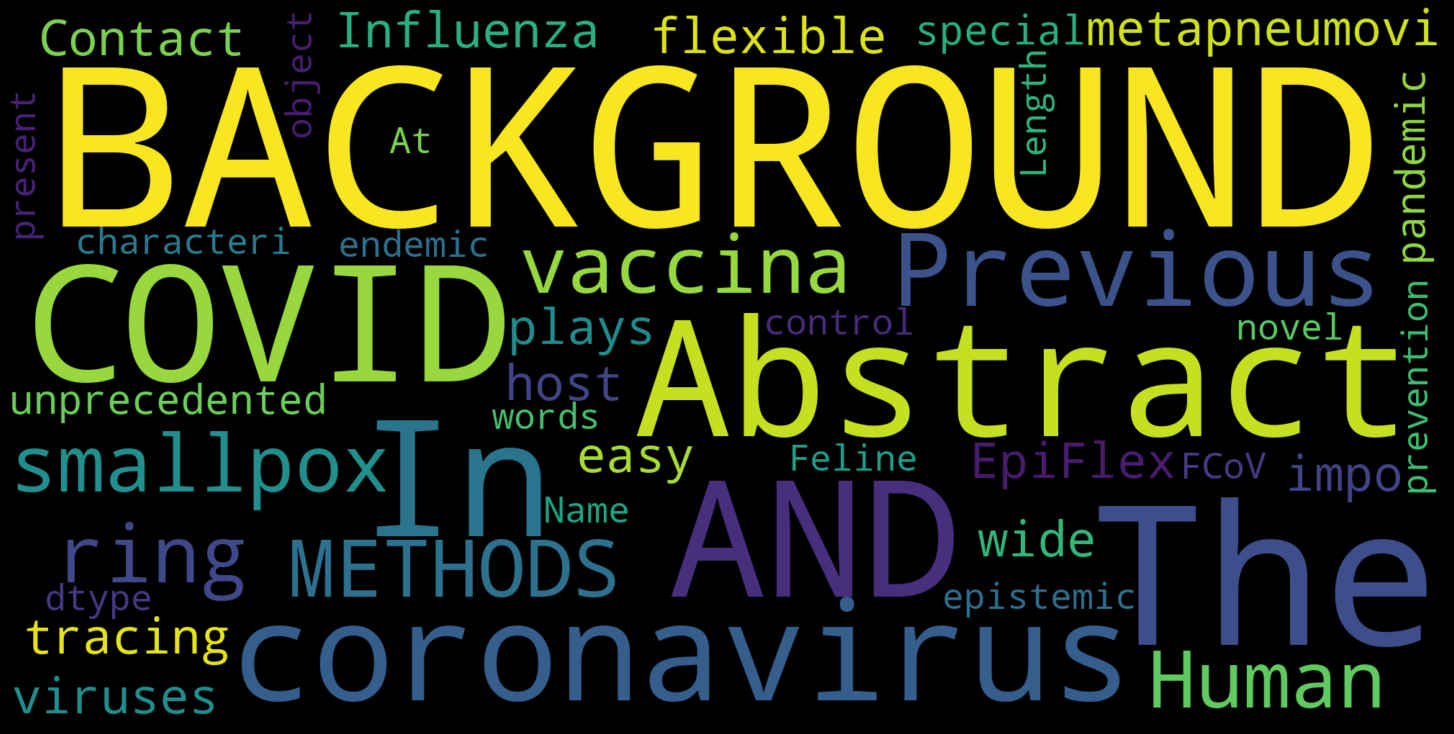

In [104]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Asymptomatic['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [106]:
#Q4. Proportion of patients who were asymptomatic
Q4a=Asymptomatic[Asymptomatic['abstract'].str.contains('number of asymptomatic')]
Q4a.shape
Q4a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
48333,Addressing COVID-19 Among People Experiencing ...,2020-06-09,Public health reports,https://doi.org/10.1177/0033354920936227; http...,People experiencing homelessness are at high r...,10.1177/0033354920936227,cuemi94l,"[People, experiencing, homelessness, are, at, ..."
53169,Why the immune system fails to mount an adapti...,2020-04-01,Transplant international : official journal of...,https://doi.org/10.1111/tri.13611; https://www...,The Covid-19 pandemic has already affected man...,10.1111/tri.13611,z2n51cet,"[The, Covid, 19, pandemic, has, already, affec..."


In [107]:
Q4b=Asymptomatic[Asymptomatic['abstract'].str.contains('asymptomatic patients')]
Q4b.shape
Q4= pd.concat([Q4a, Q4b])
Q4.to_csv('Proportion_Of_Patients_Were_Asymptomatic.csv')

In [108]:
#Q5. Pediatric patients who were asymptomatic
Q5a=Asymptomatic[Asymptomatic['abstract'].str.contains('asymptomatic children')]
Q5a.shape
Q5a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
207,Human Bocavirus Infections in Hospitalized Chi...,2008-02-08,Emerg Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Studies have reported human bocavirus (HBoV) i...,10.3201/eid1402.070851,uj7lyawj,"[Studies, have, reported, human, bocavirus, HB..."
1151,Carriage of Mycoplasma pneumoniae in the Upper...,2013-05-14,PLoS Med,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,BACKGROUND: Mycoplasma pneumoniae is thought t...,10.1371/journal.pmed.1001444,d6awwygy,"[BACKGROUND, Mycoplasma, pneumoniae, is, thoug..."


In [109]:
Q5b=Asymptomatic[Asymptomatic['abstract'].str.contains('pediatric')]
Q5b.shape
Q5b.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
143,"La Crosse virus infectivity, pathogenesis, and...",2008-02-11,Virol J,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,"BACKGROUND: La Crosse virus (LACV), family Bun...",10.1186/1743-422x-5-25,eflxldnr,"[BACKGROUND, La, Crosse, virus, LACV, family, ..."
1179,Correlation between Dengue-Specific Neutralizi...,2013-06-13,PLoS Negl Trop Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Although heterotypic secondary infection with ...,10.1371/journal.pntd.0002274,asghqx6q,"[Although, heterotypic, secondary, infection, ..."


In [110]:
Q5=pd.concat([Q5a, Q5b])
Q5.to_csv('Pediatric_Patients_Were_Asymptomatic.csv') 

In [111]:
##Q7 Natural history of the virus from an infected person
Q7a=Abs1[Abs1['abstract'].str.contains('virus history')]
Q7a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
63091,Biological and social aspects of Coronavirus D...,2020-05-08,Brazilian oral research,https://doi.org/10.1590/1807-3107bor-2020.vol3...,The expansion of coronavirus disease 2019 (COV...,10.1590/1807-3107bor-2020.vol34.0041,sdsxi65c,"[The, expansion, of, coronavirus, disease, 201..."
134000,Biological and social aspects of Coronavirus D...,2020,Braz Oral Res,NaN,The expansion of coronavirus disease 2019 (COV...,NaN,w0xtnr07,"[The, expansion, of, coronavirus, disease, 201..."


In [112]:
Q7b=Abs1[Abs1['abstract'].str.contains('history of the virus')]
Q7b.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
75169,A Statistical Analysis Of CoV-19 Positive Test...,2020-04-29,NaN,http://medrxiv.org/cgi/content/short/2020.04.2...,Increased attention to analysis of SARS-CoV-2 ...,10.1101/2020.04.24.20078402,uyq45ryf,"[Increased, attention, to, analysis, of, SARS,..."
81598,Characterization of SARS-CoV-2 viral diversity...,2020-05-11,bioRxiv,https://doi.org/10.1101/2020.05.07.083410,"In light of the current COVID-19 pandemic, the...",10.1101/2020.05.07.083410,vk8s1f23,"[In, light, of, the, current, COVID, 19, pande..."


In [113]:
Q7=pd.concat([Q7a, Q7b])
Q7.to_csv('Natural_History_Of_Virus.csv')

In [114]:
##Q10 Manifestations
Q10a=Abs1[Abs1['abstract'].str.contains('manifest')]
Q10a.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
69,An object simulation model for modeling hypoth...,2006-08-23,Theor Biol Med Model,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"BACKGROUND: EpiFlex is a flexible, easy to use...",10.1186/1742-4682-3-32,pk7pnmlo,"[BACKGROUND, EpiFlex, is, a, flexible, easy, t..."
95,Immune reconstitution inflammatory syndrome (I...,2007-05-08,AIDS Res Ther,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,The immune reconstitution inflammatory syndrom...,10.1186/1742-6405-4-9,4y8ghcpq,"[The, immune, reconstitution, inflammatory, sy..."


In [115]:
Manifestations=Abs1[Abs1['abstract'].str.contains('manifestation')]
Manifestations.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
69,An object simulation model for modeling hypoth...,2006-08-23,Theor Biol Med Model,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"BACKGROUND: EpiFlex is a flexible, easy to use...",10.1186/1742-4682-3-32,pk7pnmlo,"[BACKGROUND, EpiFlex, is, a, flexible, easy, t..."
95,Immune reconstitution inflammatory syndrome (I...,2007-05-08,AIDS Res Ther,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,The immune reconstitution inflammatory syndrom...,10.1186/1742-6405-4-9,4y8ghcpq,"[The, immune, reconstitution, inflammatory, sy..."


In [116]:
Manifestations.to_csv('Manifestations.csv')

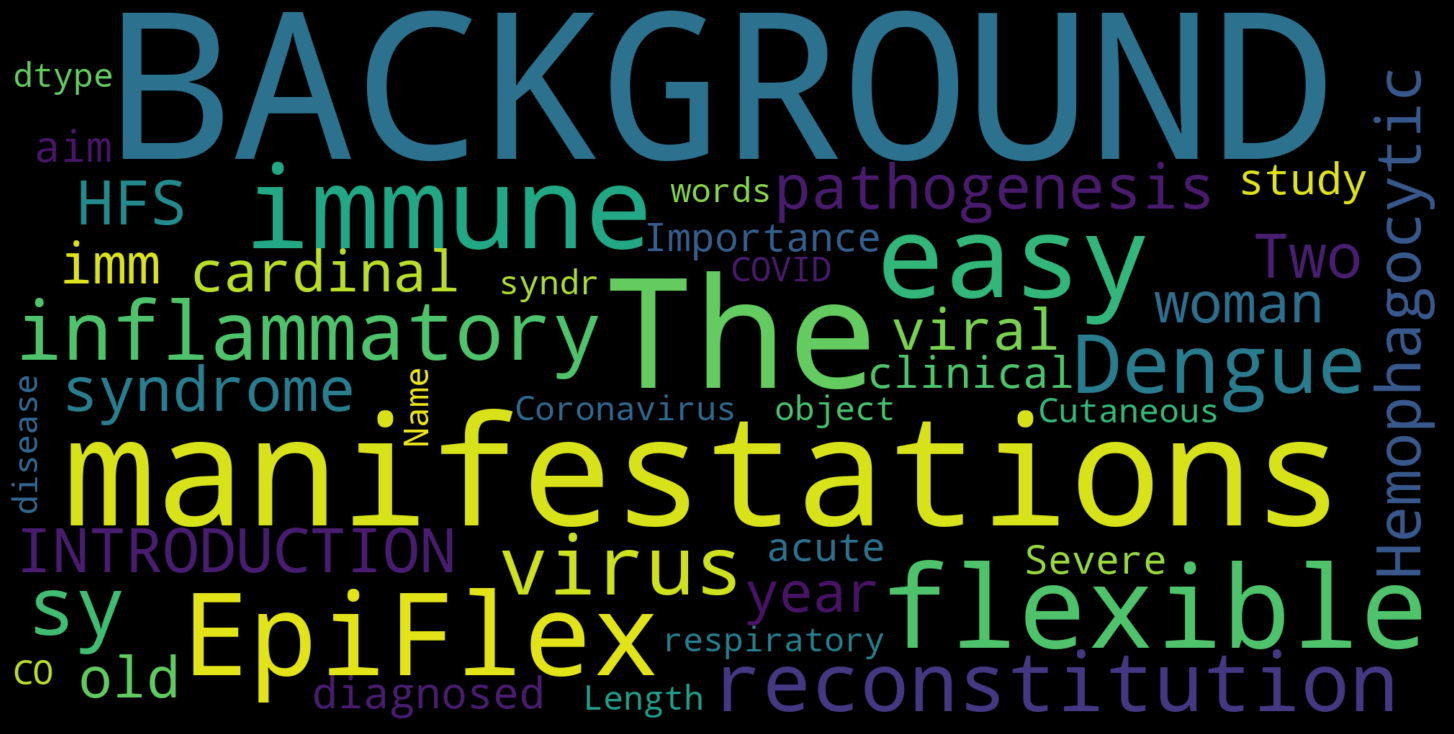

In [117]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Manifestations['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [118]:
#Viral load table
Viral_LOAD=Abs1[Abs1['abstract'].str.contains('viral load')]
Viral_LOAD.head(2)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
249,Low-Cost HIV-1 Diagnosis and Quantification in...,2009-06-05,PLoS One,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,BACKGROUND: Rapid and cost-effective methods f...,10.1371/journal.pone.0005819,10j9cp9c,"[BACKGROUND, Rapid, and, cost, effective, meth..."
300,Prevalence of human herpesvirus 6 antibodies a...,2008-05-30,Arch Immunol Ther Exp (Warsz),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,INTRODUCTION: Human herpesvirus 6 (HHV-6) has ...,10.1007/s00005-008-0021-6,duwfxeyt,"[INTRODUCTION, Human, herpesvirus, 6, HHV, 6, ..."


In [119]:
# saving the dataframe 
Viral_LOAD.to_csv('Viral_LOAD.csv') 

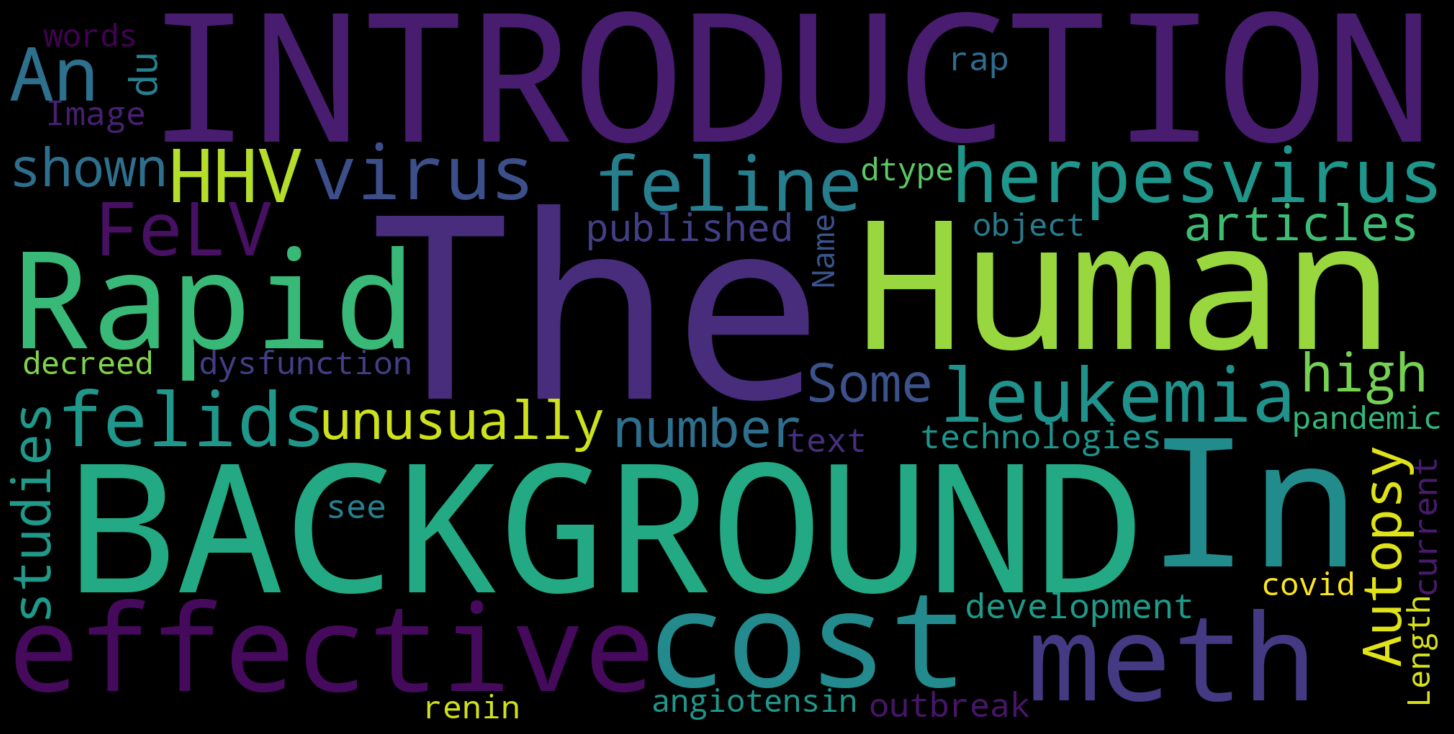

In [120]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Viral_LOAD['words']))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [121]:
Q11=Viral_LOAD[Viral_LOAD['abstract'].str.contains('presentation')]
Q11.shape
Q11.to_csv('Viral_Load_Relate_To_Disease_Presentation.csv') 

,Unnamed: 0,title,publish_time,journal,url,abstract,doi,cord_uid,words
0,6800,Characterization of viral genomic mutations in...,2019-07-13,Virus Genes,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Since February 2013, human infections with the...",10.1007/s11262-019-01678-8,9gjlfk2w,"['Since', 'February', '2013', 'human', 'infect..."
1,52384,Critically Ill Patients With the Middle East R...,2017,Critical care medicine,https://doi.org/10.1097/ccm.0000000000002621; ...,OBJECTIVES To describe patient characteristics...,10.1097/ccm.0000000000002621,xt2jgb8y,"['OBJECTIVES', 'To', 'describe', 'patient', 'c..."


In [144]:
x1=pd.read_csv("/home/varun/Task/Viral_Shedding_Duration.csv")
c1=x1.url.count()
c1

13

In [145]:
x2=pd.read_csv("/home/varun/Task/Incubation_Period_COVID.csv")
c2=x2.url.count()
c2

398

In [146]:
x3=pd.read_csv("/home/varun/Task/Natural_History_Of_Virus.csv")
c3=x3.url.count()
c3

10

In [147]:
x4=pd.read_csv("/home/varun/Task/Proportion_Of_Patients_Were_Asymptomatic.csv")
c4=x4.url.count()
c4

270

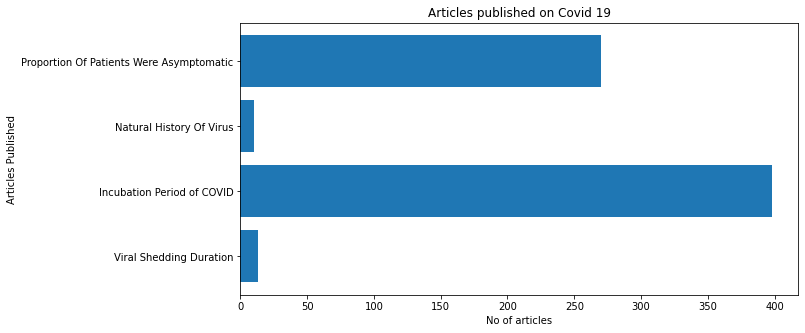

In [149]:
from matplotlib import pyplot as plt
import seaborn as sns 
categories = ['Viral Shedding Duration', 'Incubation Period of COVID', 'Natural History Of Virus', 'Proportion Of Patients Were Asymptomatic']
data = [c1,c2,c3,c4]


fig = plt.figure(figsize = (10, 5)) 
plt.barh(categories, data) 
plt.xlabel("No of articles") 
plt.ylabel("Articles Published")
plt.title("Articles published on Covid 19") 
plt.show()